In [20]:
# TOPIC  : 		ML model development for HDAC3 inhibitors with selected PaDEL-descriptors and the AM1 parameter values (i.e., Formation energy).
# TITLE  : 		A semiempirical and machine learning approach for fragment-based structural analysis of non-hydroxamate HDAC3 inhibitors
# AUTHOR : 	  Dr. Sk. Abdul Amin

# Bugs   :    If you encounter any bugs, please report the issue to my mail id askabdul@unisa.it

# Import the necessary libraries
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


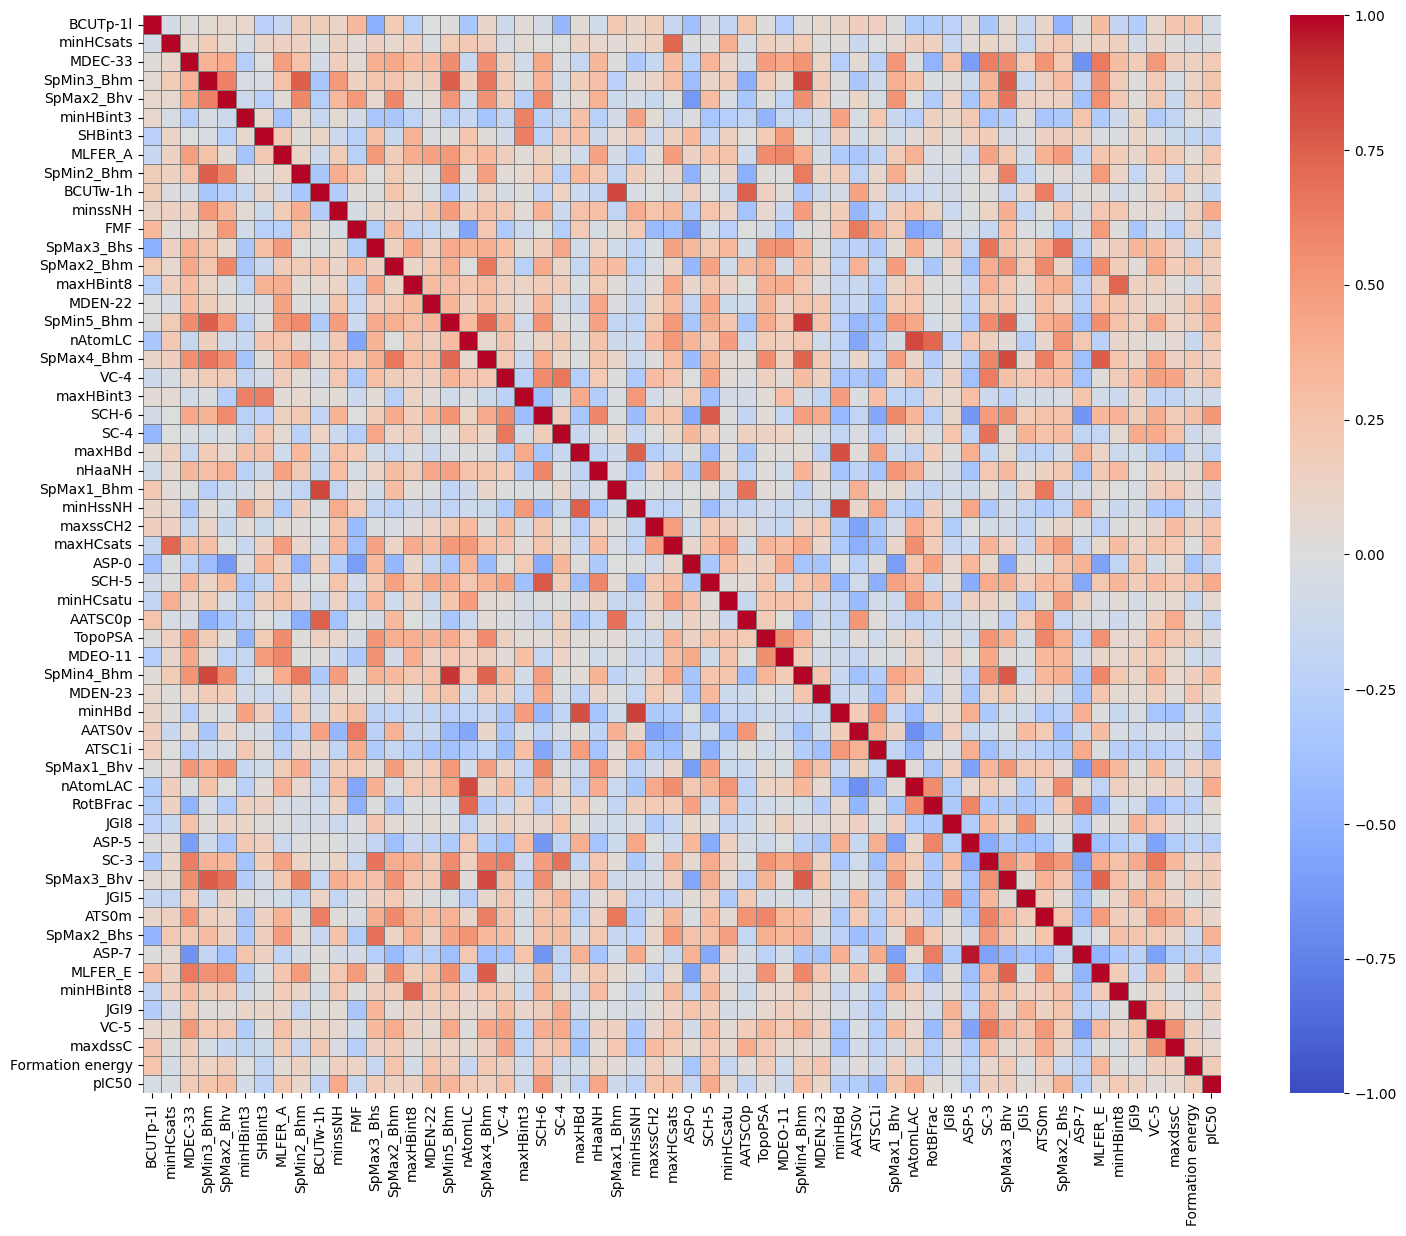

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/4_Work/2_HDAC3_NonHydroxamates/HDAC3_966_train_set.csv', sep =',') # Specify the input path

descriptor_columns = data.columns[1:-1].tolist()

# Calculate the correlation matrix
correlation_matrix = data[descriptor_columns].corr()
plt.figure(figsize=(18, 14))

# Draw the heatmap
sns.heatmap(correlation_matrix,
            annot=False,
            cmap='coolwarm',
            cbar=True,
            square=True,
            linewidths=0.5,
            linecolor='gray',
            vmin=-1, vmax=1)

# Save the figure
# output_path = '/content/drive/MyDrive/4_Work/2_HDAC3_NonHydroxamates/descriptor_correlation_heat_tr.png'  # Specify the output path
# plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the training and testing datasets
train_data = pd.read_csv('/content/drive/MyDrive/4_Work/2_HDAC3_NonHydroxamates/HDAC3_966_train_set.csv', sep=',')
test_data = pd.read_csv('/content/drive/MyDrive/4_Work/2_HDAC3_NonHydroxamates/HDAC3_966_test_set.csv', sep=',')

# Define descriptor and target columns
descriptor_columns = data.columns[1:-2].tolist()
target_column = 'pIC50_binary'

# Split the data into features (X) and target (y)
X_train = train_data[descriptor_columns]
y_train = train_data[target_column]
X_test = test_data[descriptor_columns]
y_test = test_data[target_column]

# AUTHOR : 	  Dr. Sk. Abdul Amin

rf_model = RandomForestClassifier(
    n_estimators=49,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

print("Model is trained.")

# Predict on the test set
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Model is trained.
Accuracy: 0.865979381443299
Precision: 0.8829787234042553
Recall: 0.8469387755102041
F1 Score: 0.8645833333333334
Confusion Matrix:
 [[85 11]
 [15 83]]


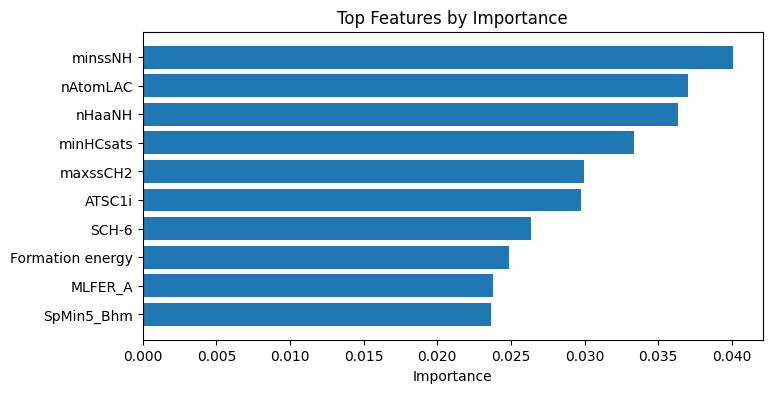

In [24]:
# Get feature importances
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': descriptor_columns, 'Importance': importances})
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8, 4))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top Features by Importance')
plt.gca().invert_yaxis()

output_path = 'Top Features by Importance.png'  # Specify the output path
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()